# Wczytanie danych

Importujemy dane z plików csv:

In [10]:
import pandas as pd
import tensorflow as tf
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

Usuńmy wszystkie kolumny poza 'text':

In [11]:
fake.pop('subject')
fake.pop('date')
fake.pop('title')
true.pop('subject')
true.pop('date')
true.pop('title')
fake.head()

text
0  Donald Trump just couldn t wish all Americans ...
1  House Intelligence Committee Chairman Devin Nu...
2  On Friday, it was revealed that former Milwauk...
3  On Christmas day, Donald Trump announced that ...
4  Pope Francis used his annual Christmas Day mes...

Dane są teraz w postaci pd.DataFrame – potrzebujemy przekonwertować je na tf.data.Dataset.

In [12]:
size = 20000

fake_texts = [t[0] for t in fake.values]
true_texts = [t[0] for t in true.values]
fake_texts = fake_texts[:int(size/2)]
true_texts = true_texts[:int(size/2)]
dataset = tf.data.Dataset.from_tensor_slices((fake_texts + true_texts, [0] * len(fake_texts) + [1] * len(true_texts)))

Rekordy są teraz ustawione sekwencyjnie, najpierw teksty-fejki, następnie prawdziwe. Ustawmy je w losowej kolejności.

In [13]:
print(dataset)
len(list(dataset))
dataset = dataset.shuffle(len(fake_texts) + len(true_texts), reshuffle_each_iteration=False)

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>


# Podział na zbiór treningowy, testowy i walidacyjny

In [14]:
train_size = int(size * 0.7)
val_size = int(size * 0.15)
test_size = int(size * 0.15)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

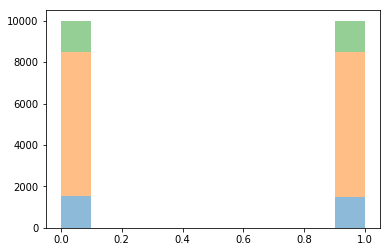

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y_test = np.array([t for i, t in test_dataset])
y_train = np.array([t for i, t in train_dataset])
y_val = np.array([t for i, t in val_dataset])

plt.hist([y_test, y_train, y_val], alpha=0.5, stacked=True)
plt.show()

# Przetwarzanie danych

Nasze datasety to zbiory tekstów (zapisanych po prostu jako string) z odpowiadającymi im klasami. Potrzebujemy zamienić je na wektory możliwie niskiej długości, które będzie można podać na wejściu klasyfikatorów / sieci neuronowych. Do tego celu użyjemy 20-wymiarowego modelu Gnews-Swivel-20-dim (https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).

In [16]:
import tensorflow_hub as hub

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)


train_examples_batch, train_labels_batch = next(iter(train_dataset.batch(train_size)))
X_train = hub_layer(train_examples_batch).numpy()
test_examples_batch, test_labels_batch = next(iter(test_dataset.batch(test_size)))
X_test = hub_layer(test_examples_batch).numpy()
val_examples_batch, val_labels_batch = next(iter(val_dataset.batch(val_size)))
X_val = hub_layer(val_examples_batch).numpy()

X_train to teraz zbiór 20-wymiarowych wektorów. Zobaczmy, jak korelują z klasą fake/true różne wymiary.

0 0


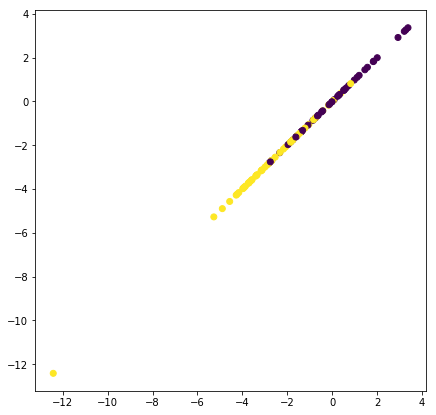

0 1


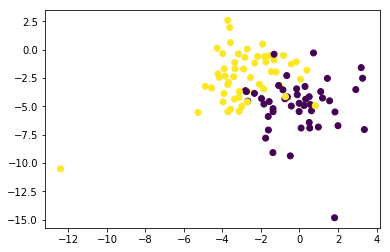

0 2


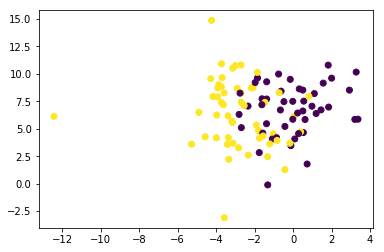

0 3


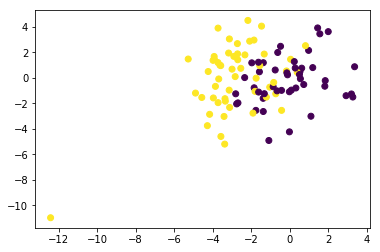

0 4


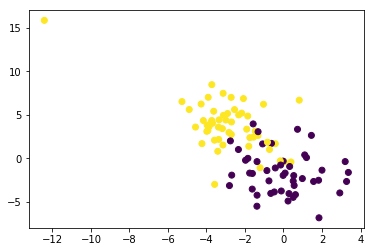

0 5


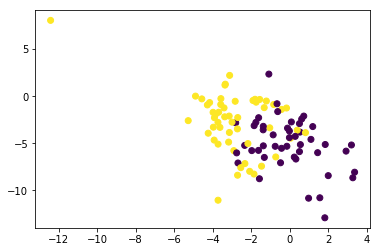

0 6


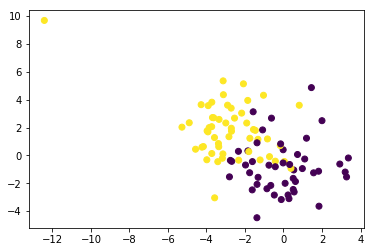

0 7


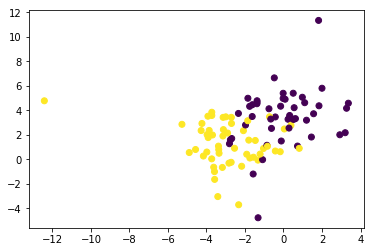

0 8


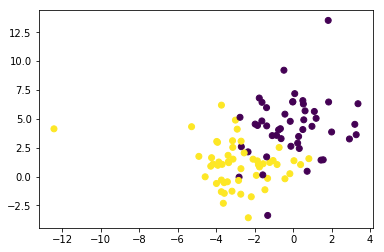

0 9


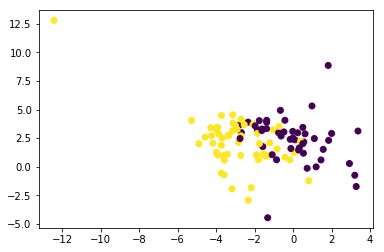

0 10


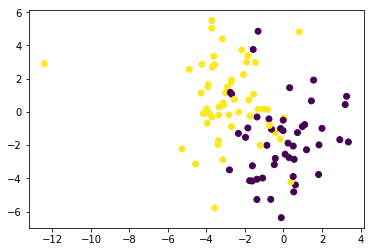

0 11


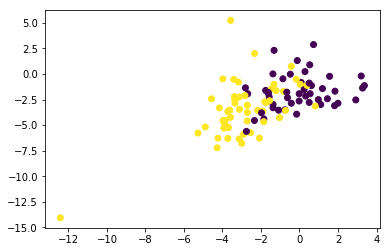

0 12


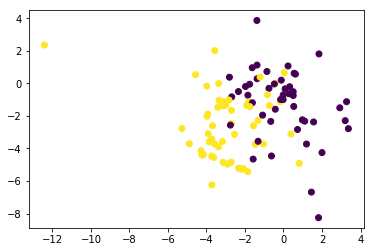

0 13


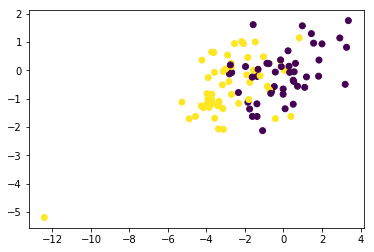

0 14


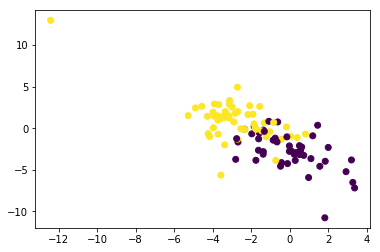

0 15


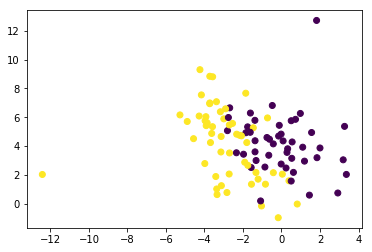

0 16


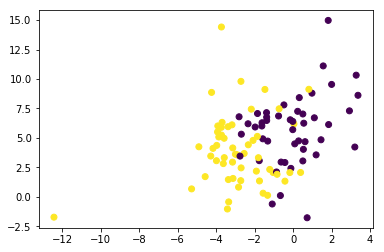

0 17


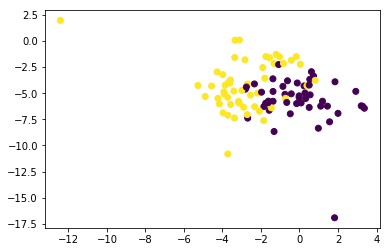

0 18


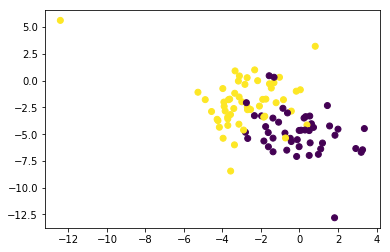

0 19


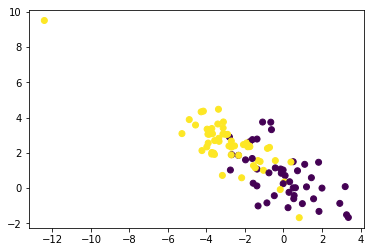

1 1


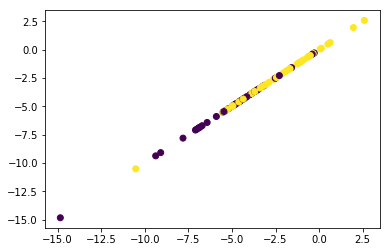

1 2


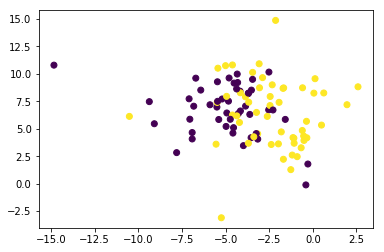

1 3


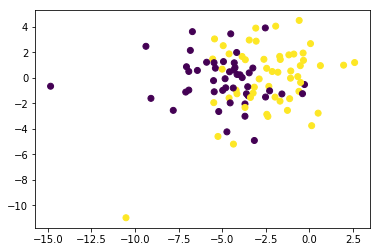

1 4


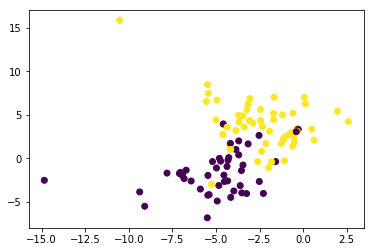

1 5


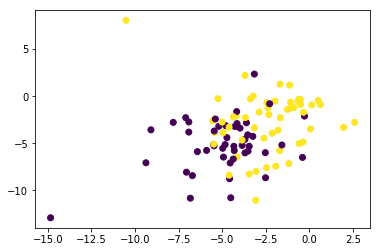

1 6


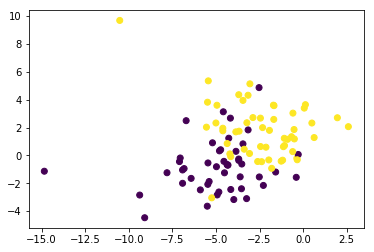

1 7


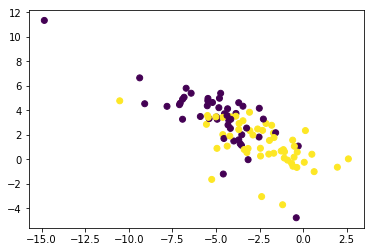

1 8


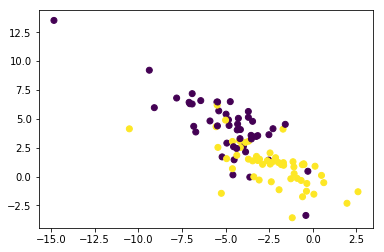

1 9


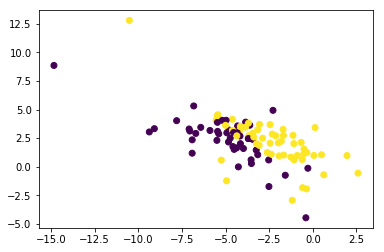

1 10


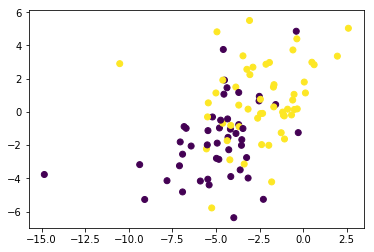

1 11


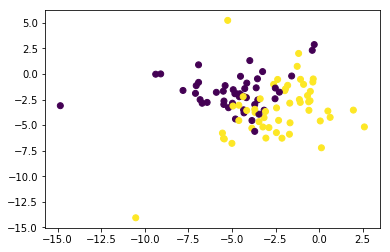

1 12


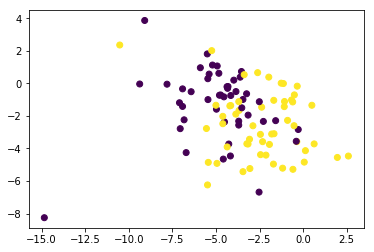

1 13


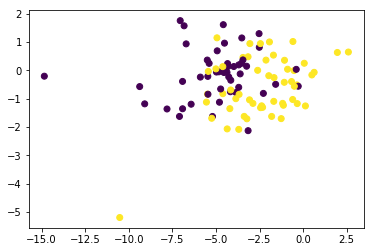

1 14


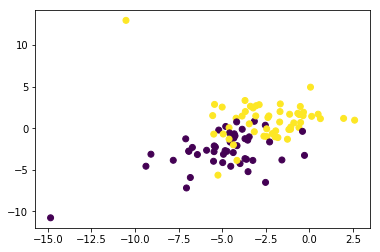

1 15


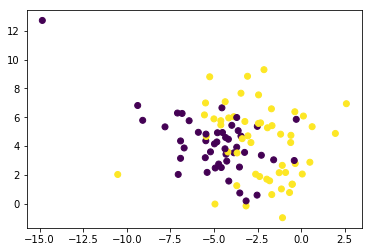

1 16


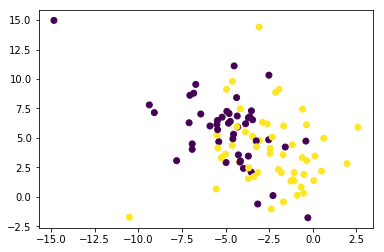

1 17


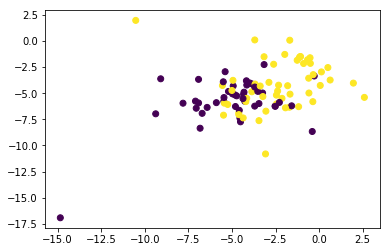

1 18


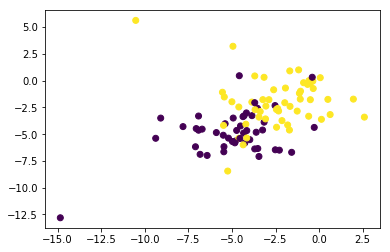

1 19


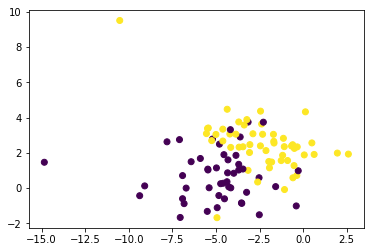

2 2


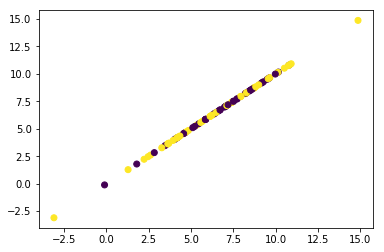

2 3


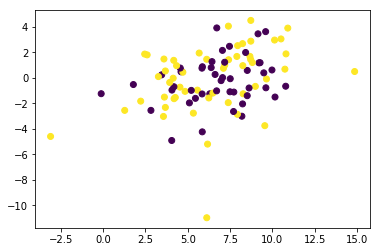

2 4


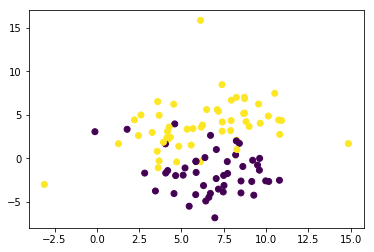

2 5


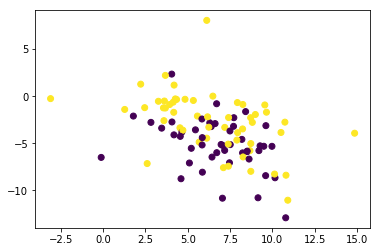

2 6


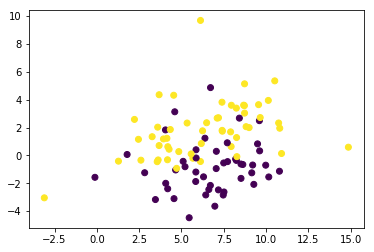

2 7


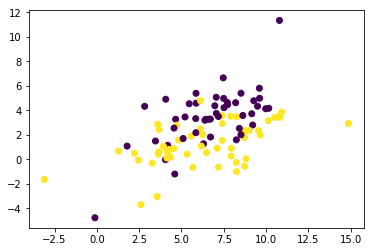

2 8


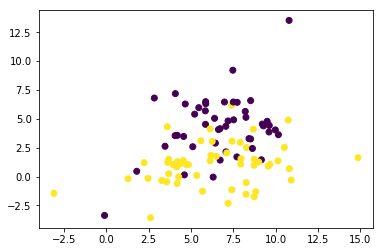

2 9


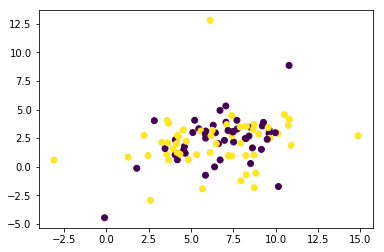

2 10


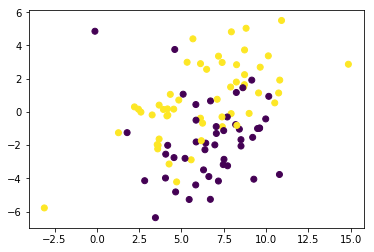

2 11


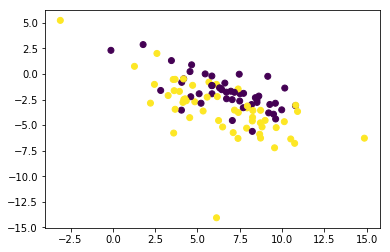

2 12


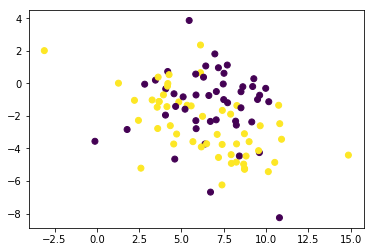

2 13


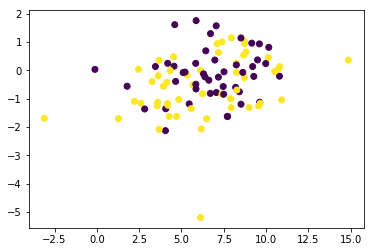

2 14


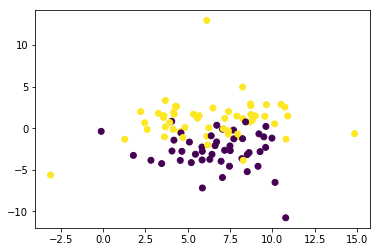

2 15


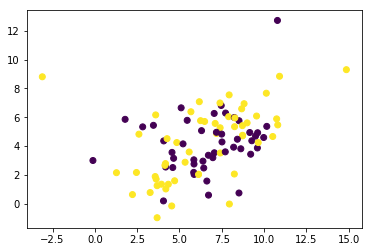

2 16


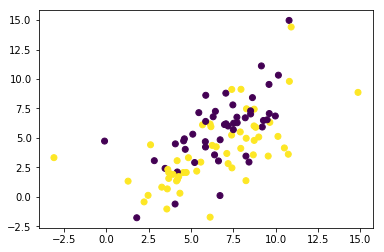

2 17


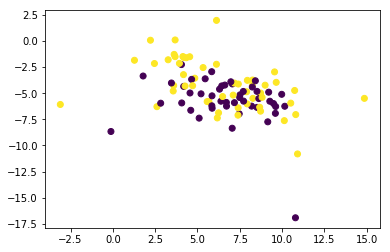

2 18


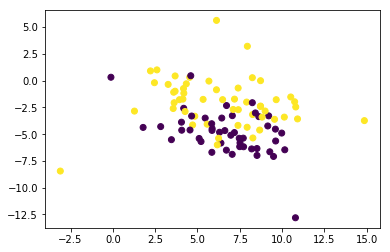

2 19


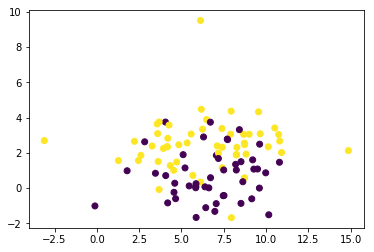

3 3


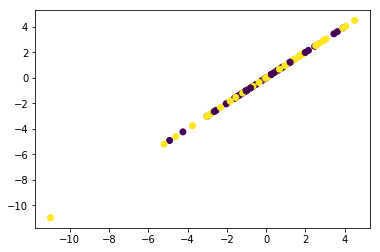

3 4


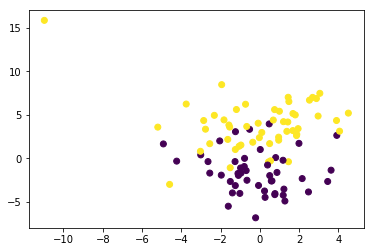

3 5


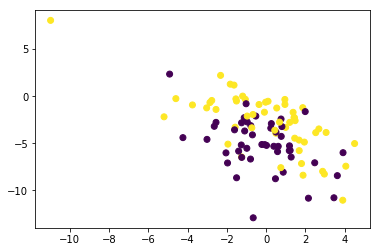

3 6


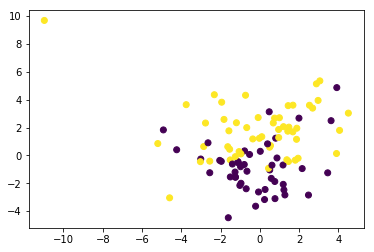

3 7


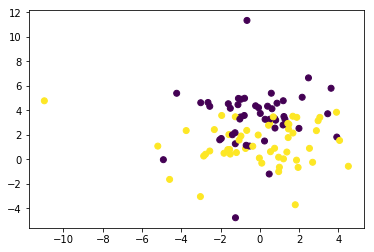

3 8


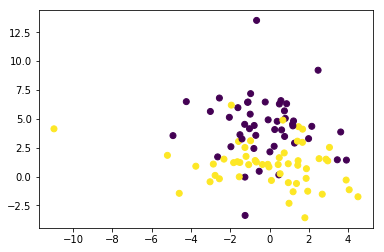

3 9


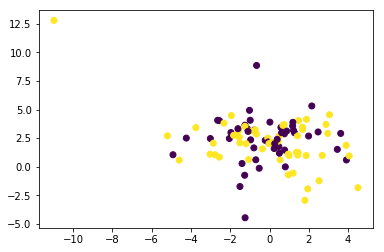

3 10


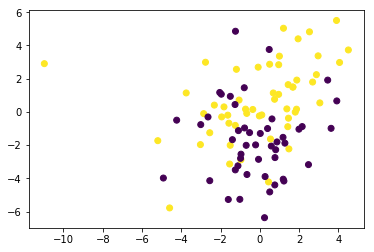

3 11


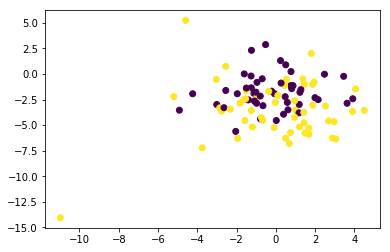

3 12


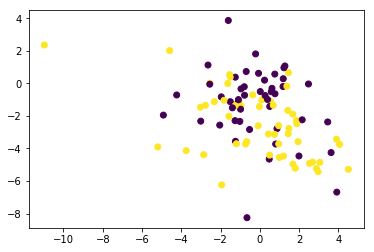

3 13


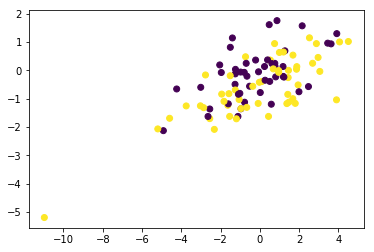

3 14


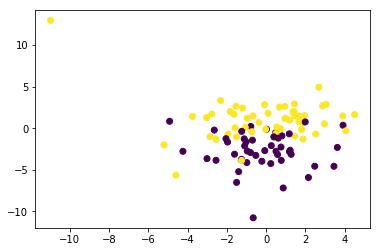

3 15


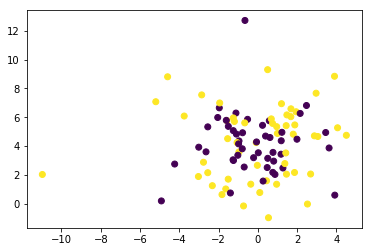

3 16


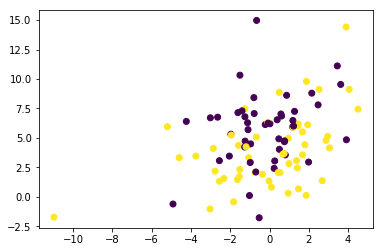

3 17


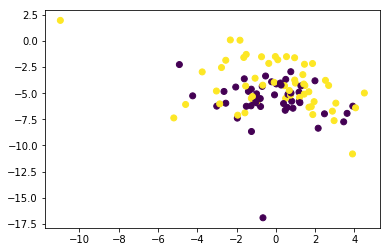

3 18


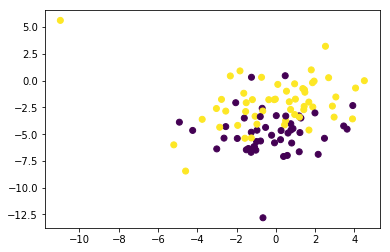

3 19


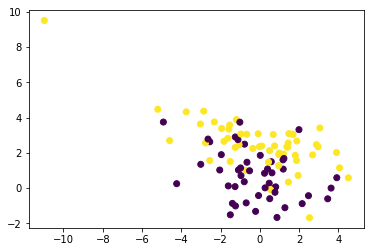

4 4


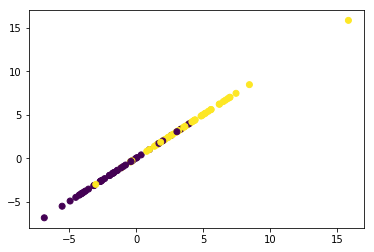

4 5


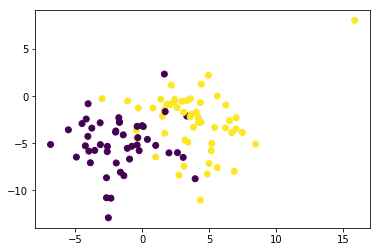

4 6


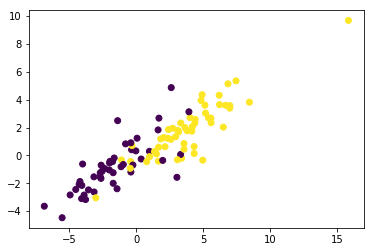

4 7


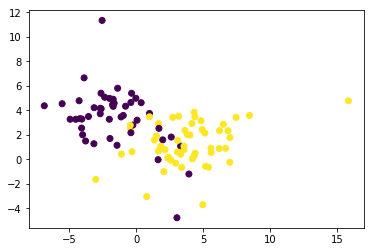

4 8


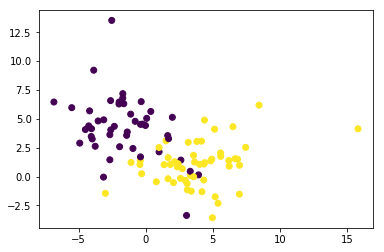

4 9


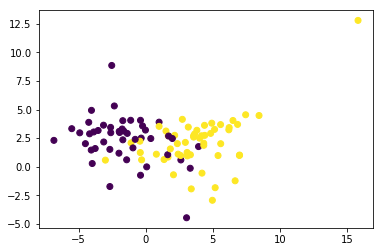

4 10


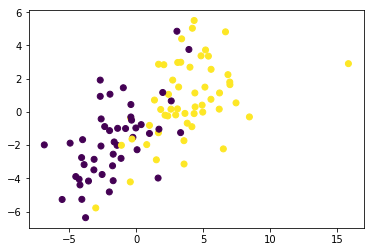

4 11


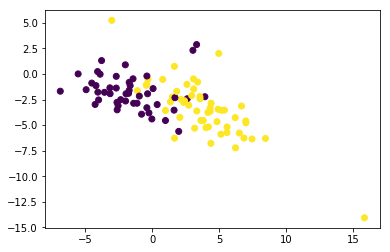

4 12


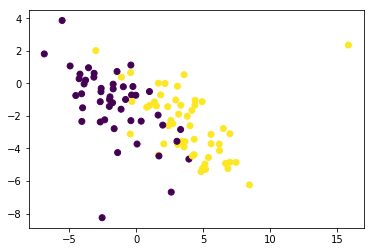

4 13


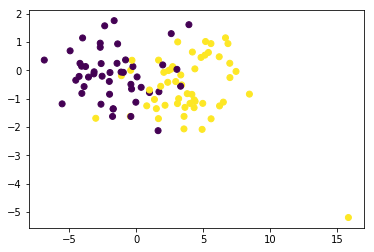

4 14


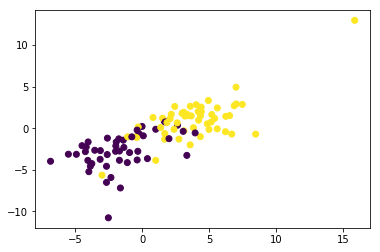

4 15


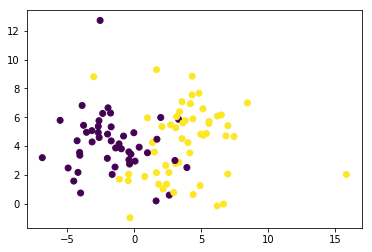

4 16


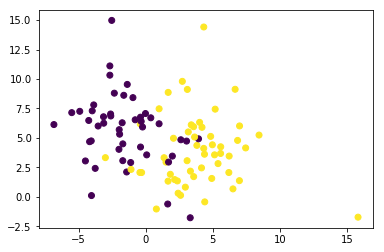

4 17


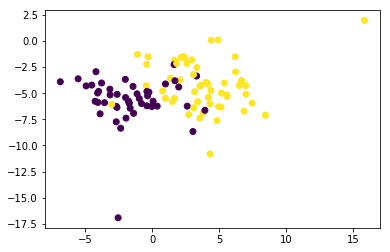

4 18


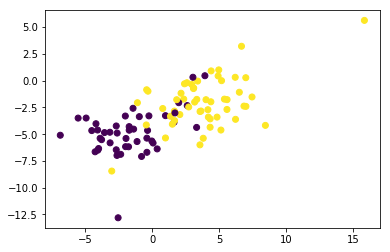

4 19


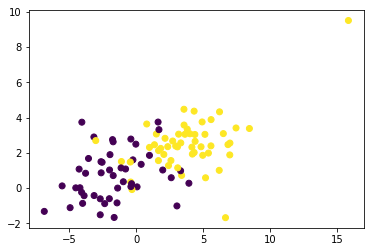

5 5


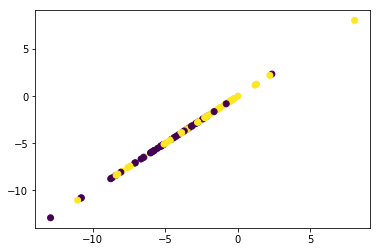

5 6


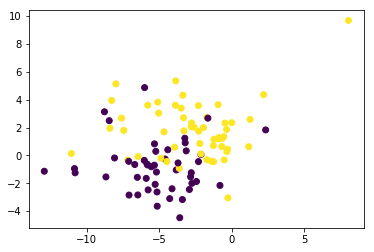

5 7


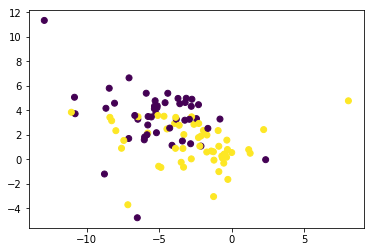

5 8


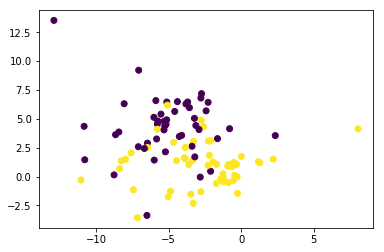

5 9


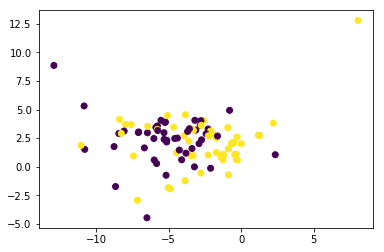

5 10


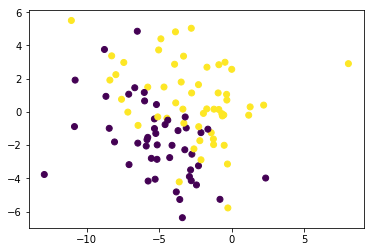

5 11


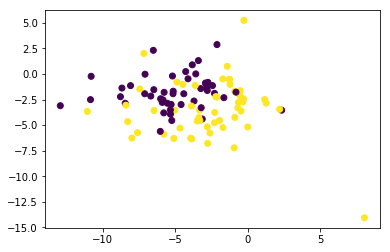

5 12


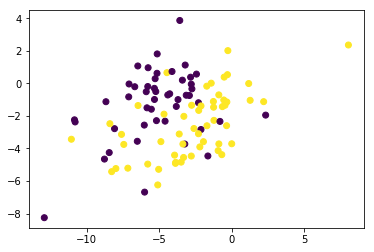

5 13


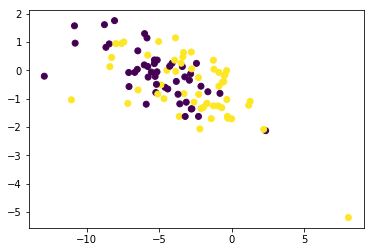

5 14


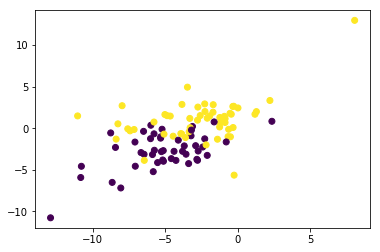

5 15


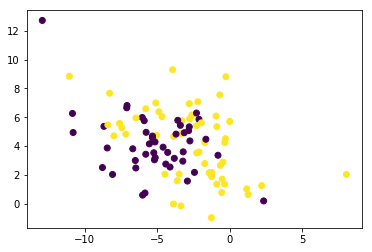

5 16


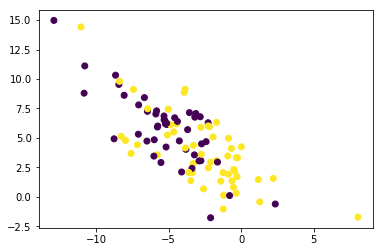

5 17


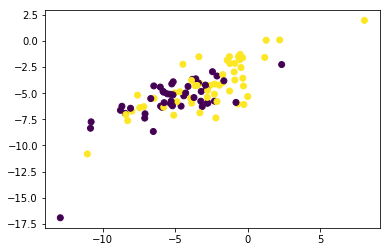

5 18


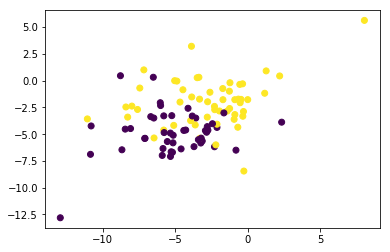

5 19


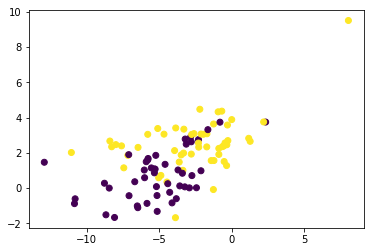

6 6


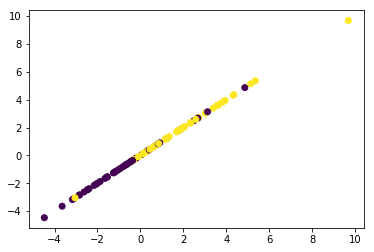

6 7


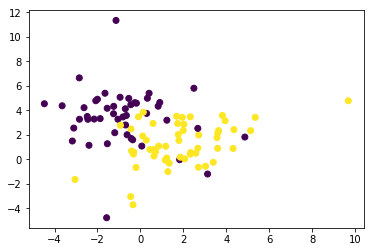

6 8


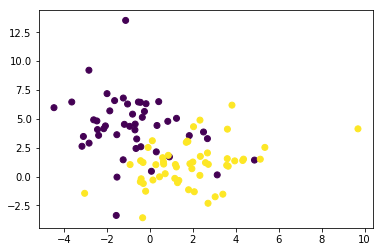

6 9


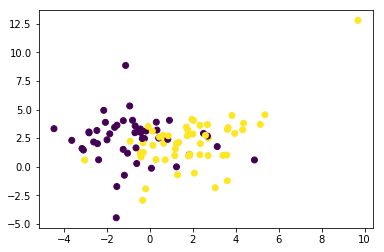

6 10


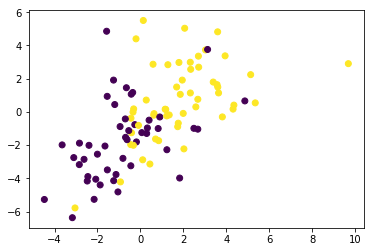

6 11


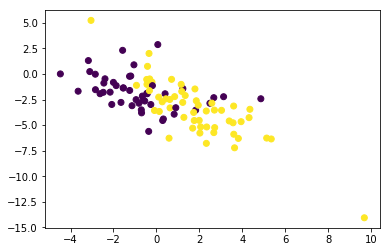

6 12


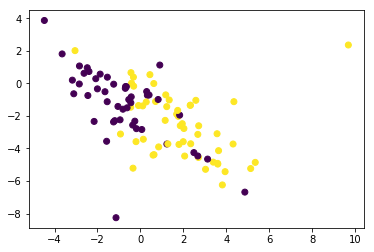

6 13


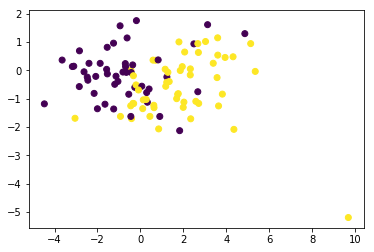

6 14


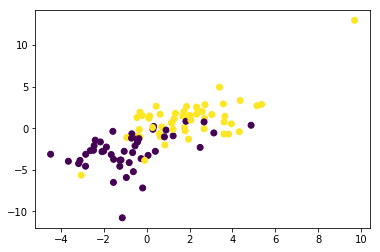

6 15


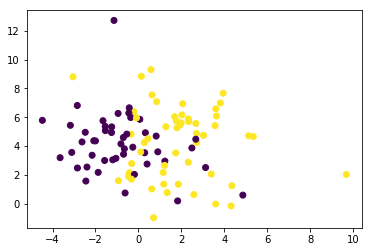

6 16


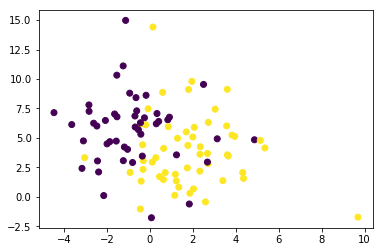

6 17


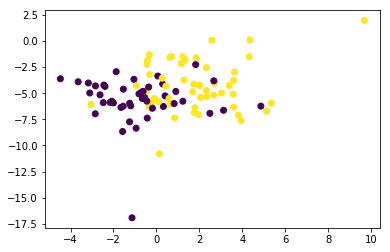

6 18


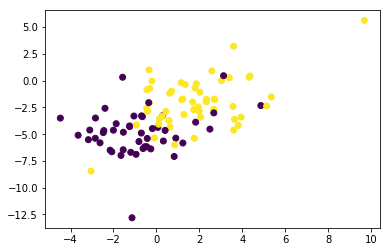

6 19


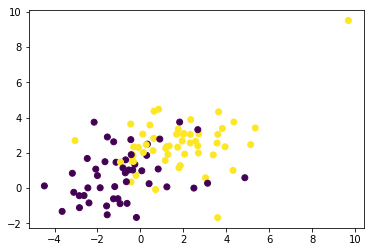

7 7


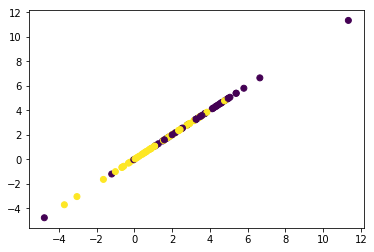

7 8


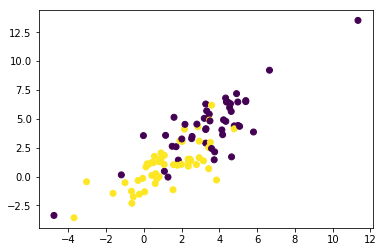

7 9


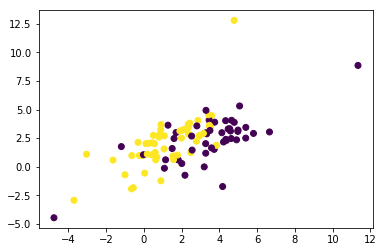

7 10


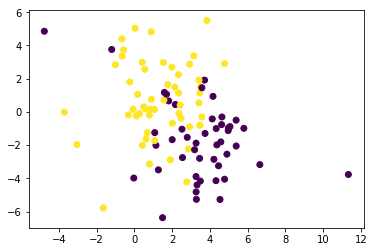

7 11


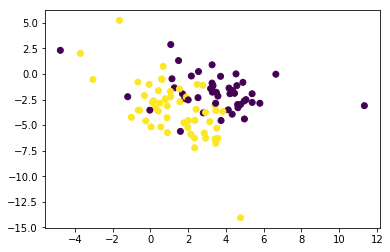

7 12


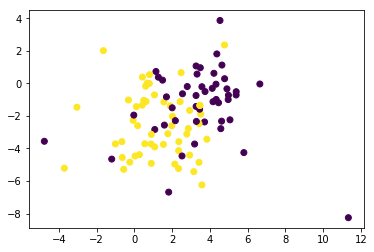

7 13


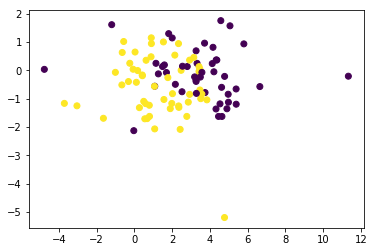

7 14


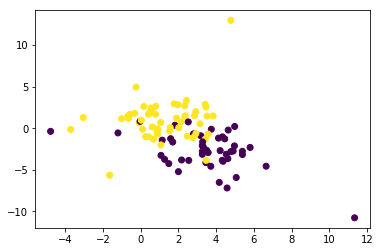

7 15


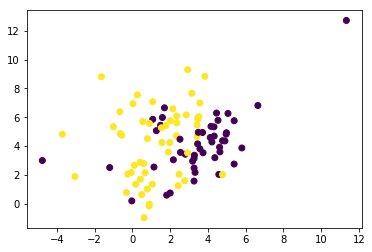

7 16


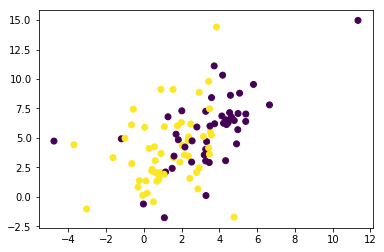

7 17


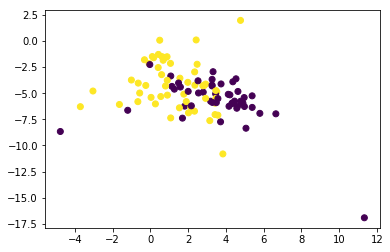

7 18


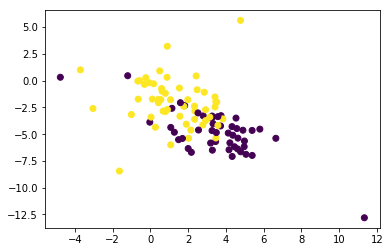

7 19


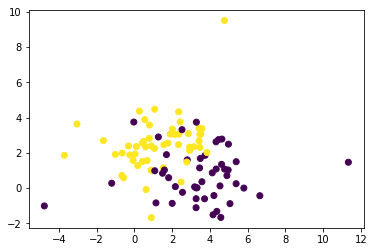

8 8


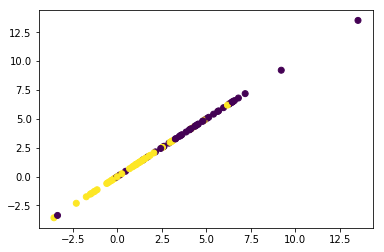

8 9


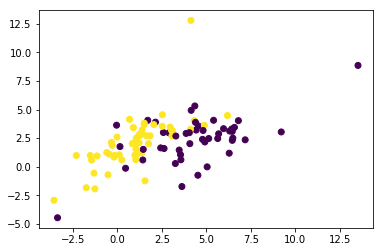

8 10


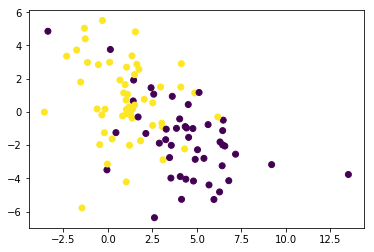

8 11


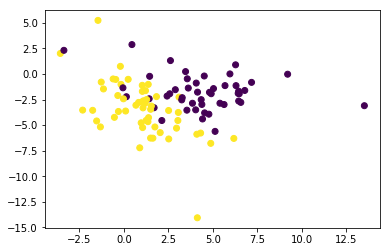

8 12


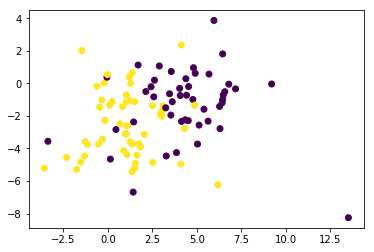

8 13


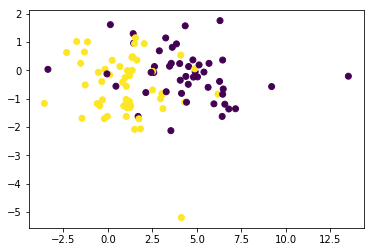

8 14


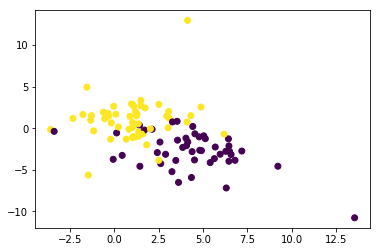

8 15


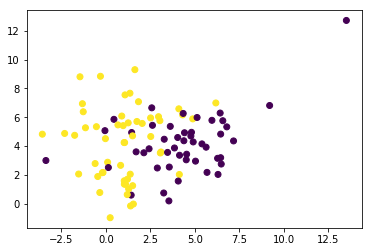

8 16


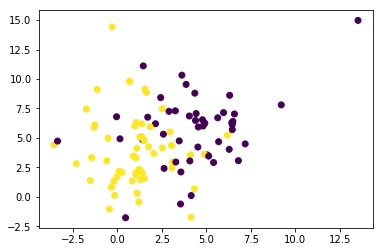

8 17


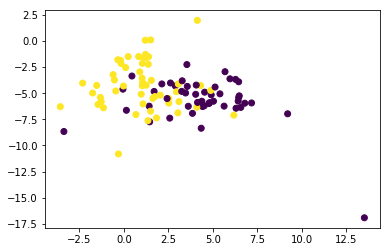

8 18


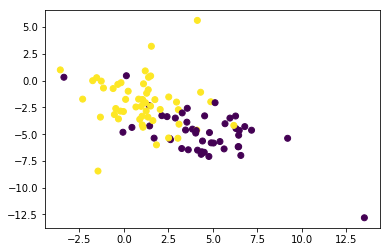

8 19


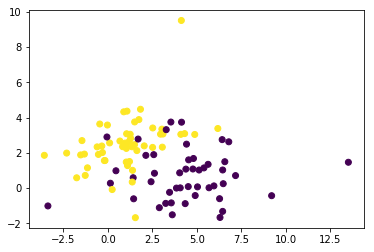

9 9


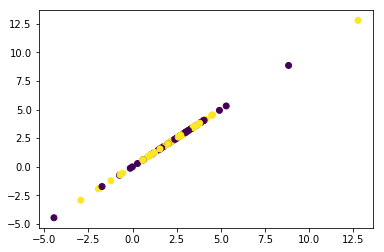

9 10


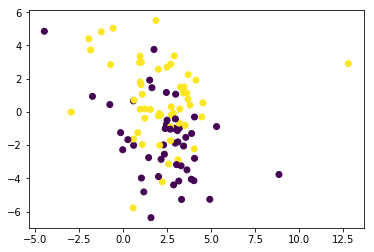

9 11


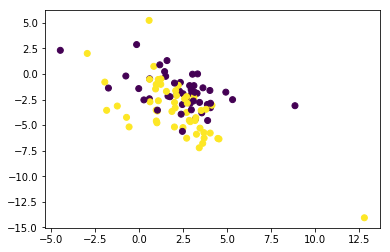

9 12


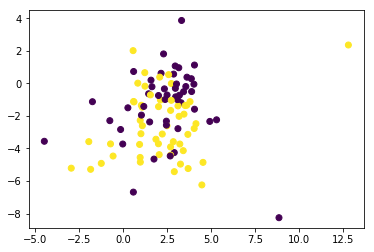

9 13


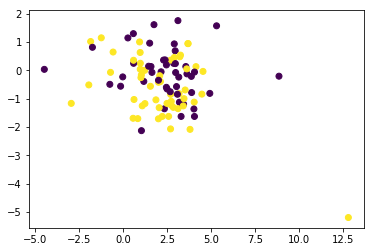

9 14


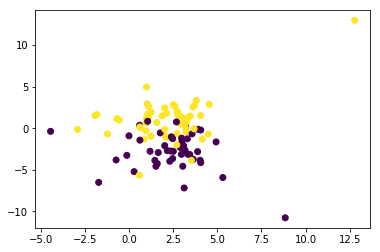

9 15


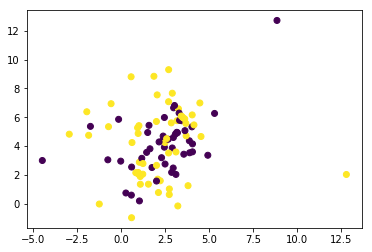

9 16


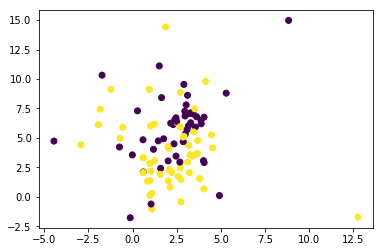

9 17


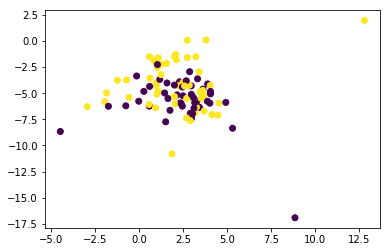

9 18


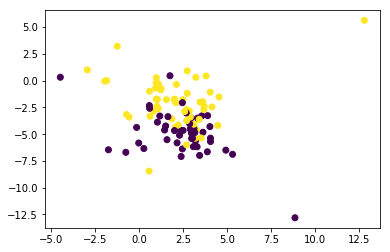

9 19


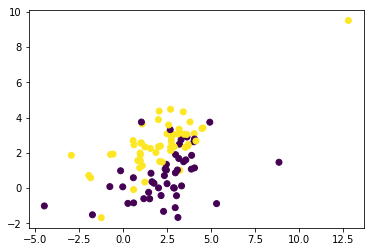

10 10


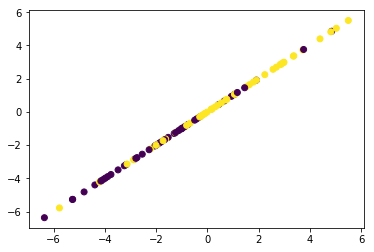

10 11


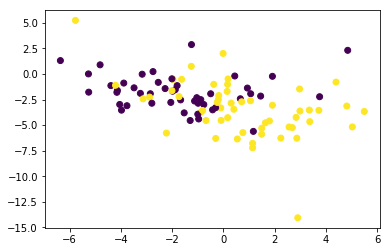

10 12


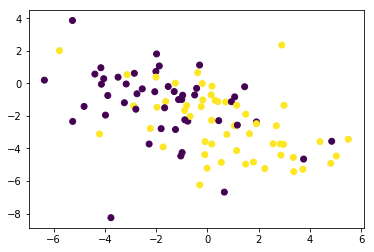

10 13


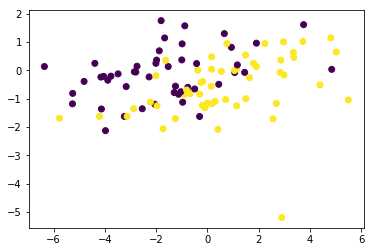

10 14


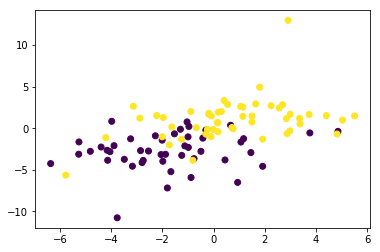

10 15


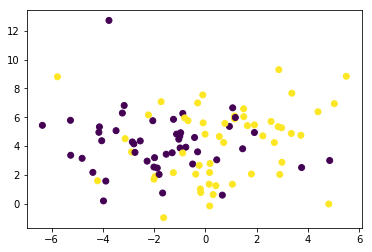

10 16


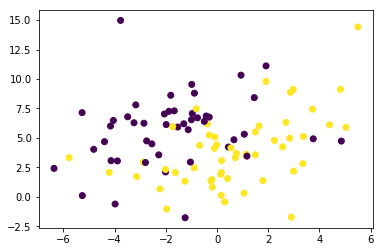

10 17


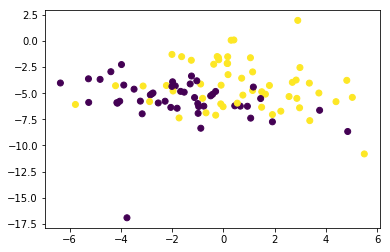

10 18


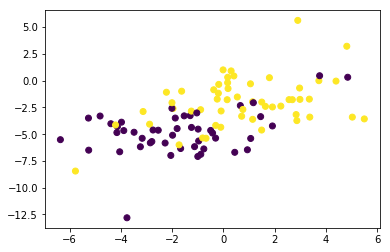

10 19


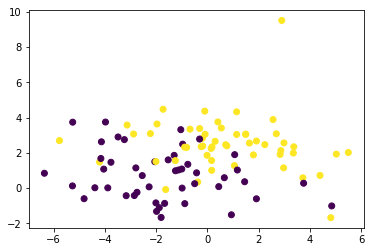

11 11


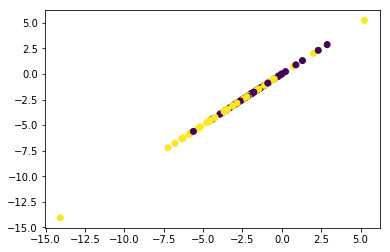

11 12


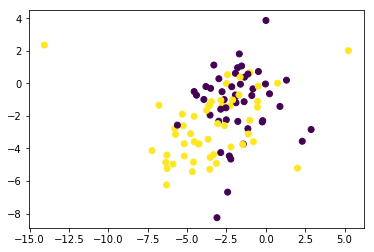

11 13


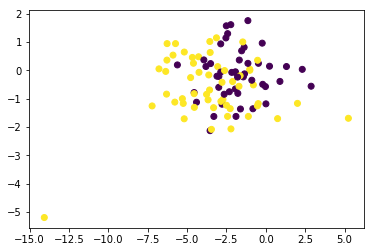

11 14


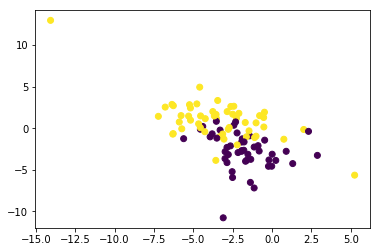

11 15


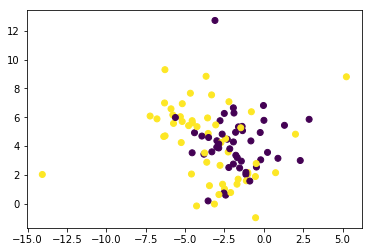

11 16


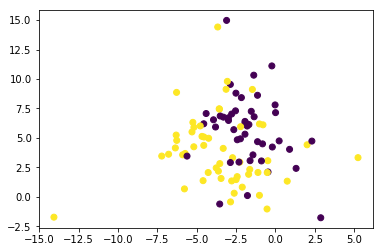

11 17


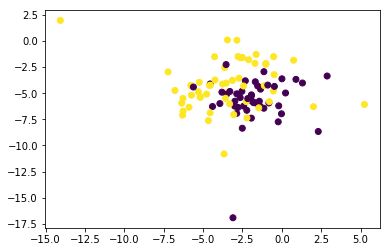

11 18


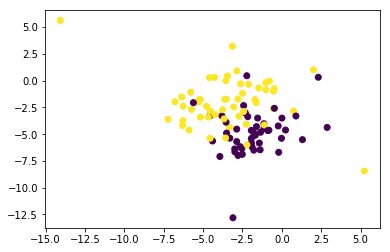

11 19


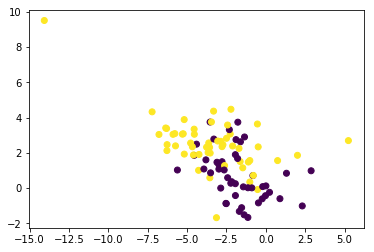

12 12


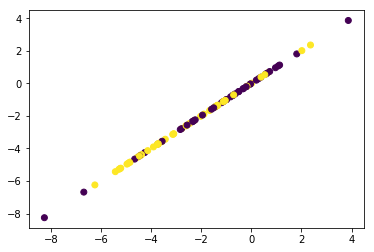

12 13


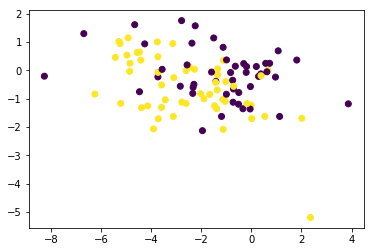

12 14


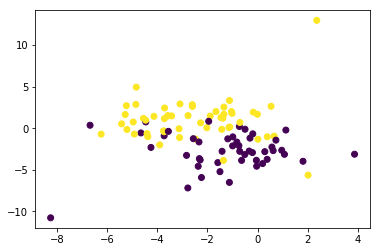

12 15


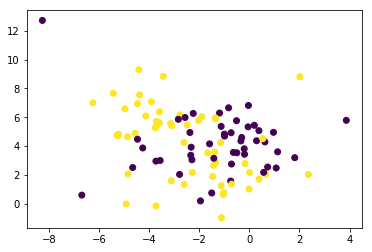

12 16


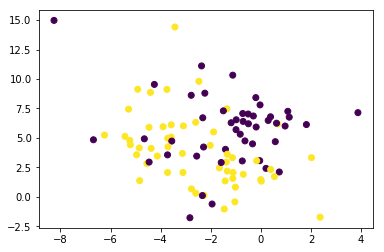

12 17


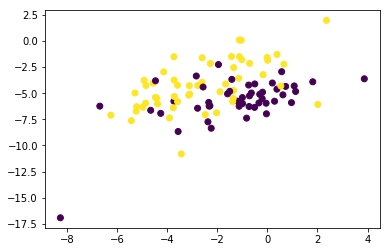

12 18


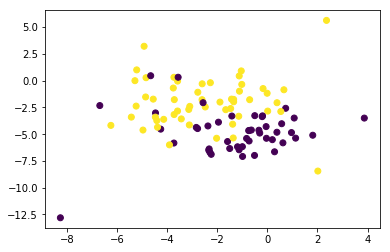

12 19


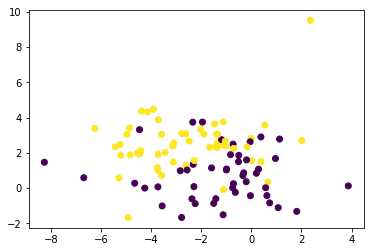

13 13


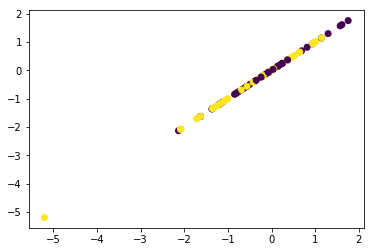

13 14


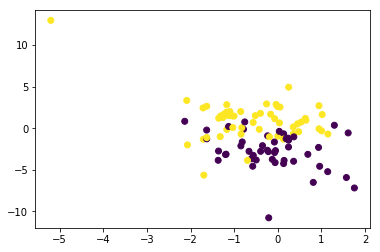

13 15


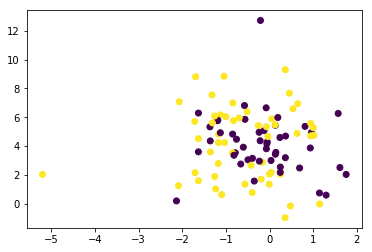

13 16


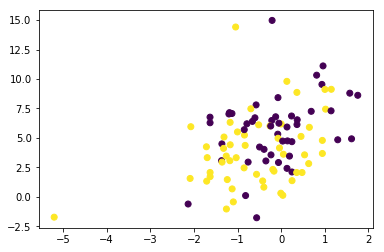

13 17


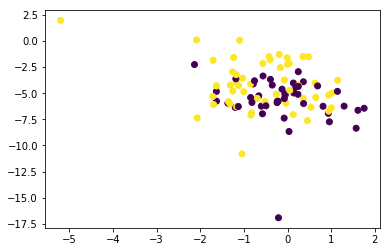

13 18


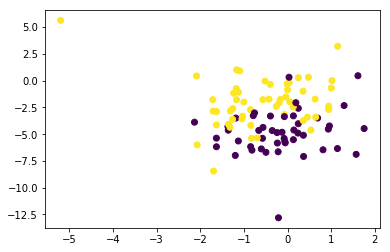

13 19


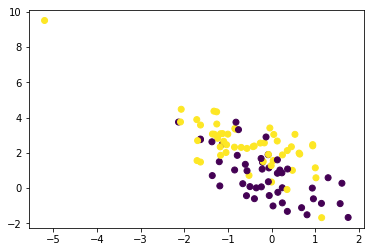

14 14


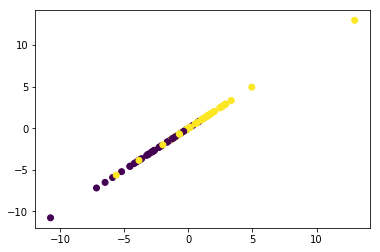

14 15


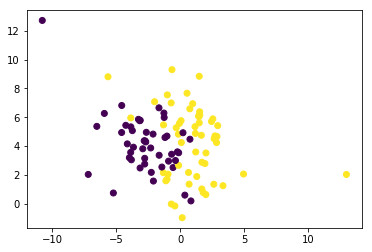

14 16


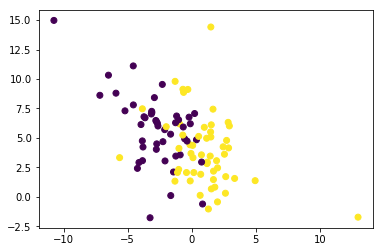

14 17


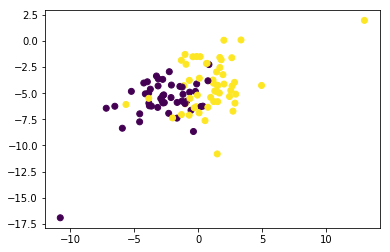

14 18


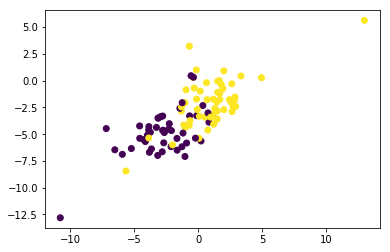

14 19


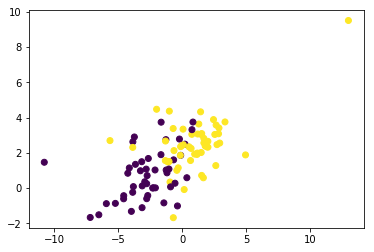

15 15


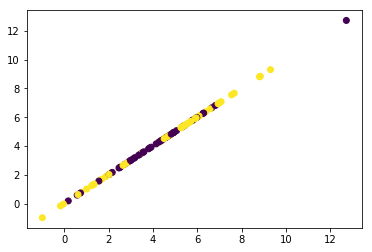

15 16


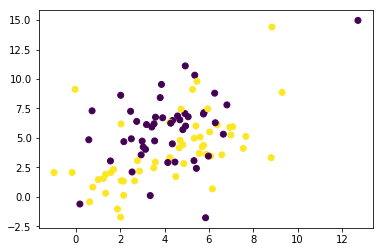

15 17


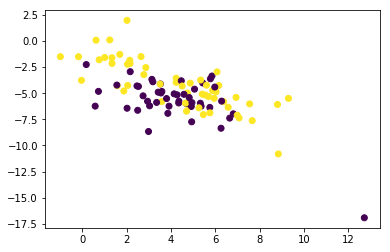

15 18


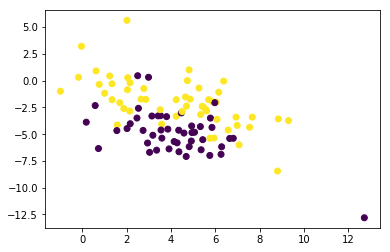

15 19


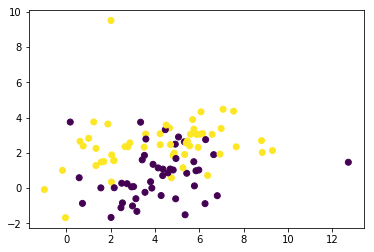

16 16


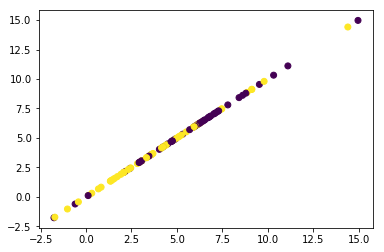

16 17


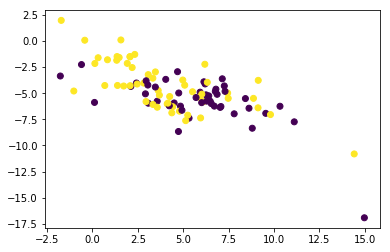

16 18


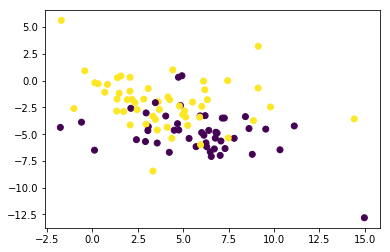

16 19


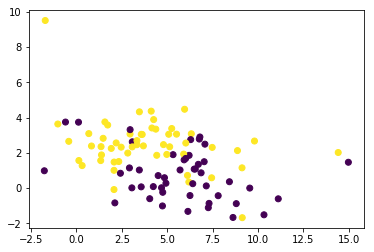

17 17


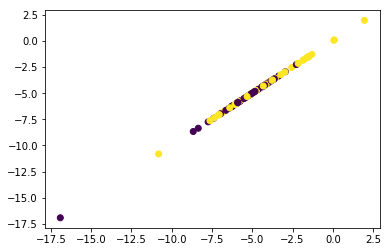

17 18


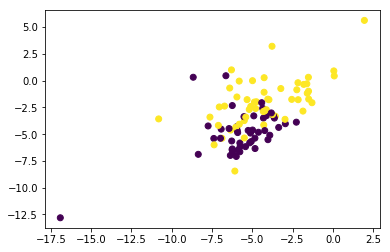

17 19


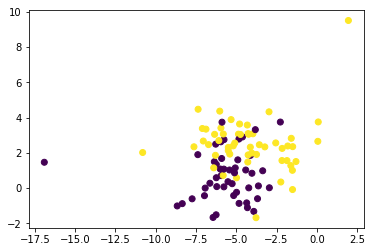

18 18


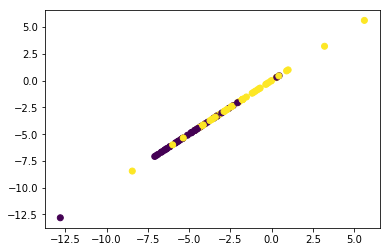

18 19


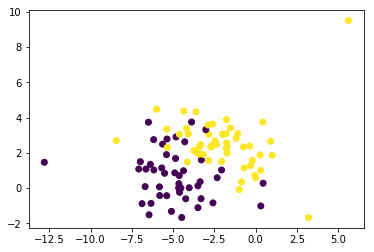

19 19


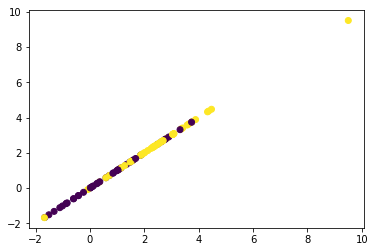

In [8]:
plt.figure(figsize=(7, 7))

for i in range(0,20):
    for j in range(i, 20):
        print(i,j)
        plt.scatter(X_train[:100, i], X_train[:100, j], c=y_train[:100])
        plt.show()

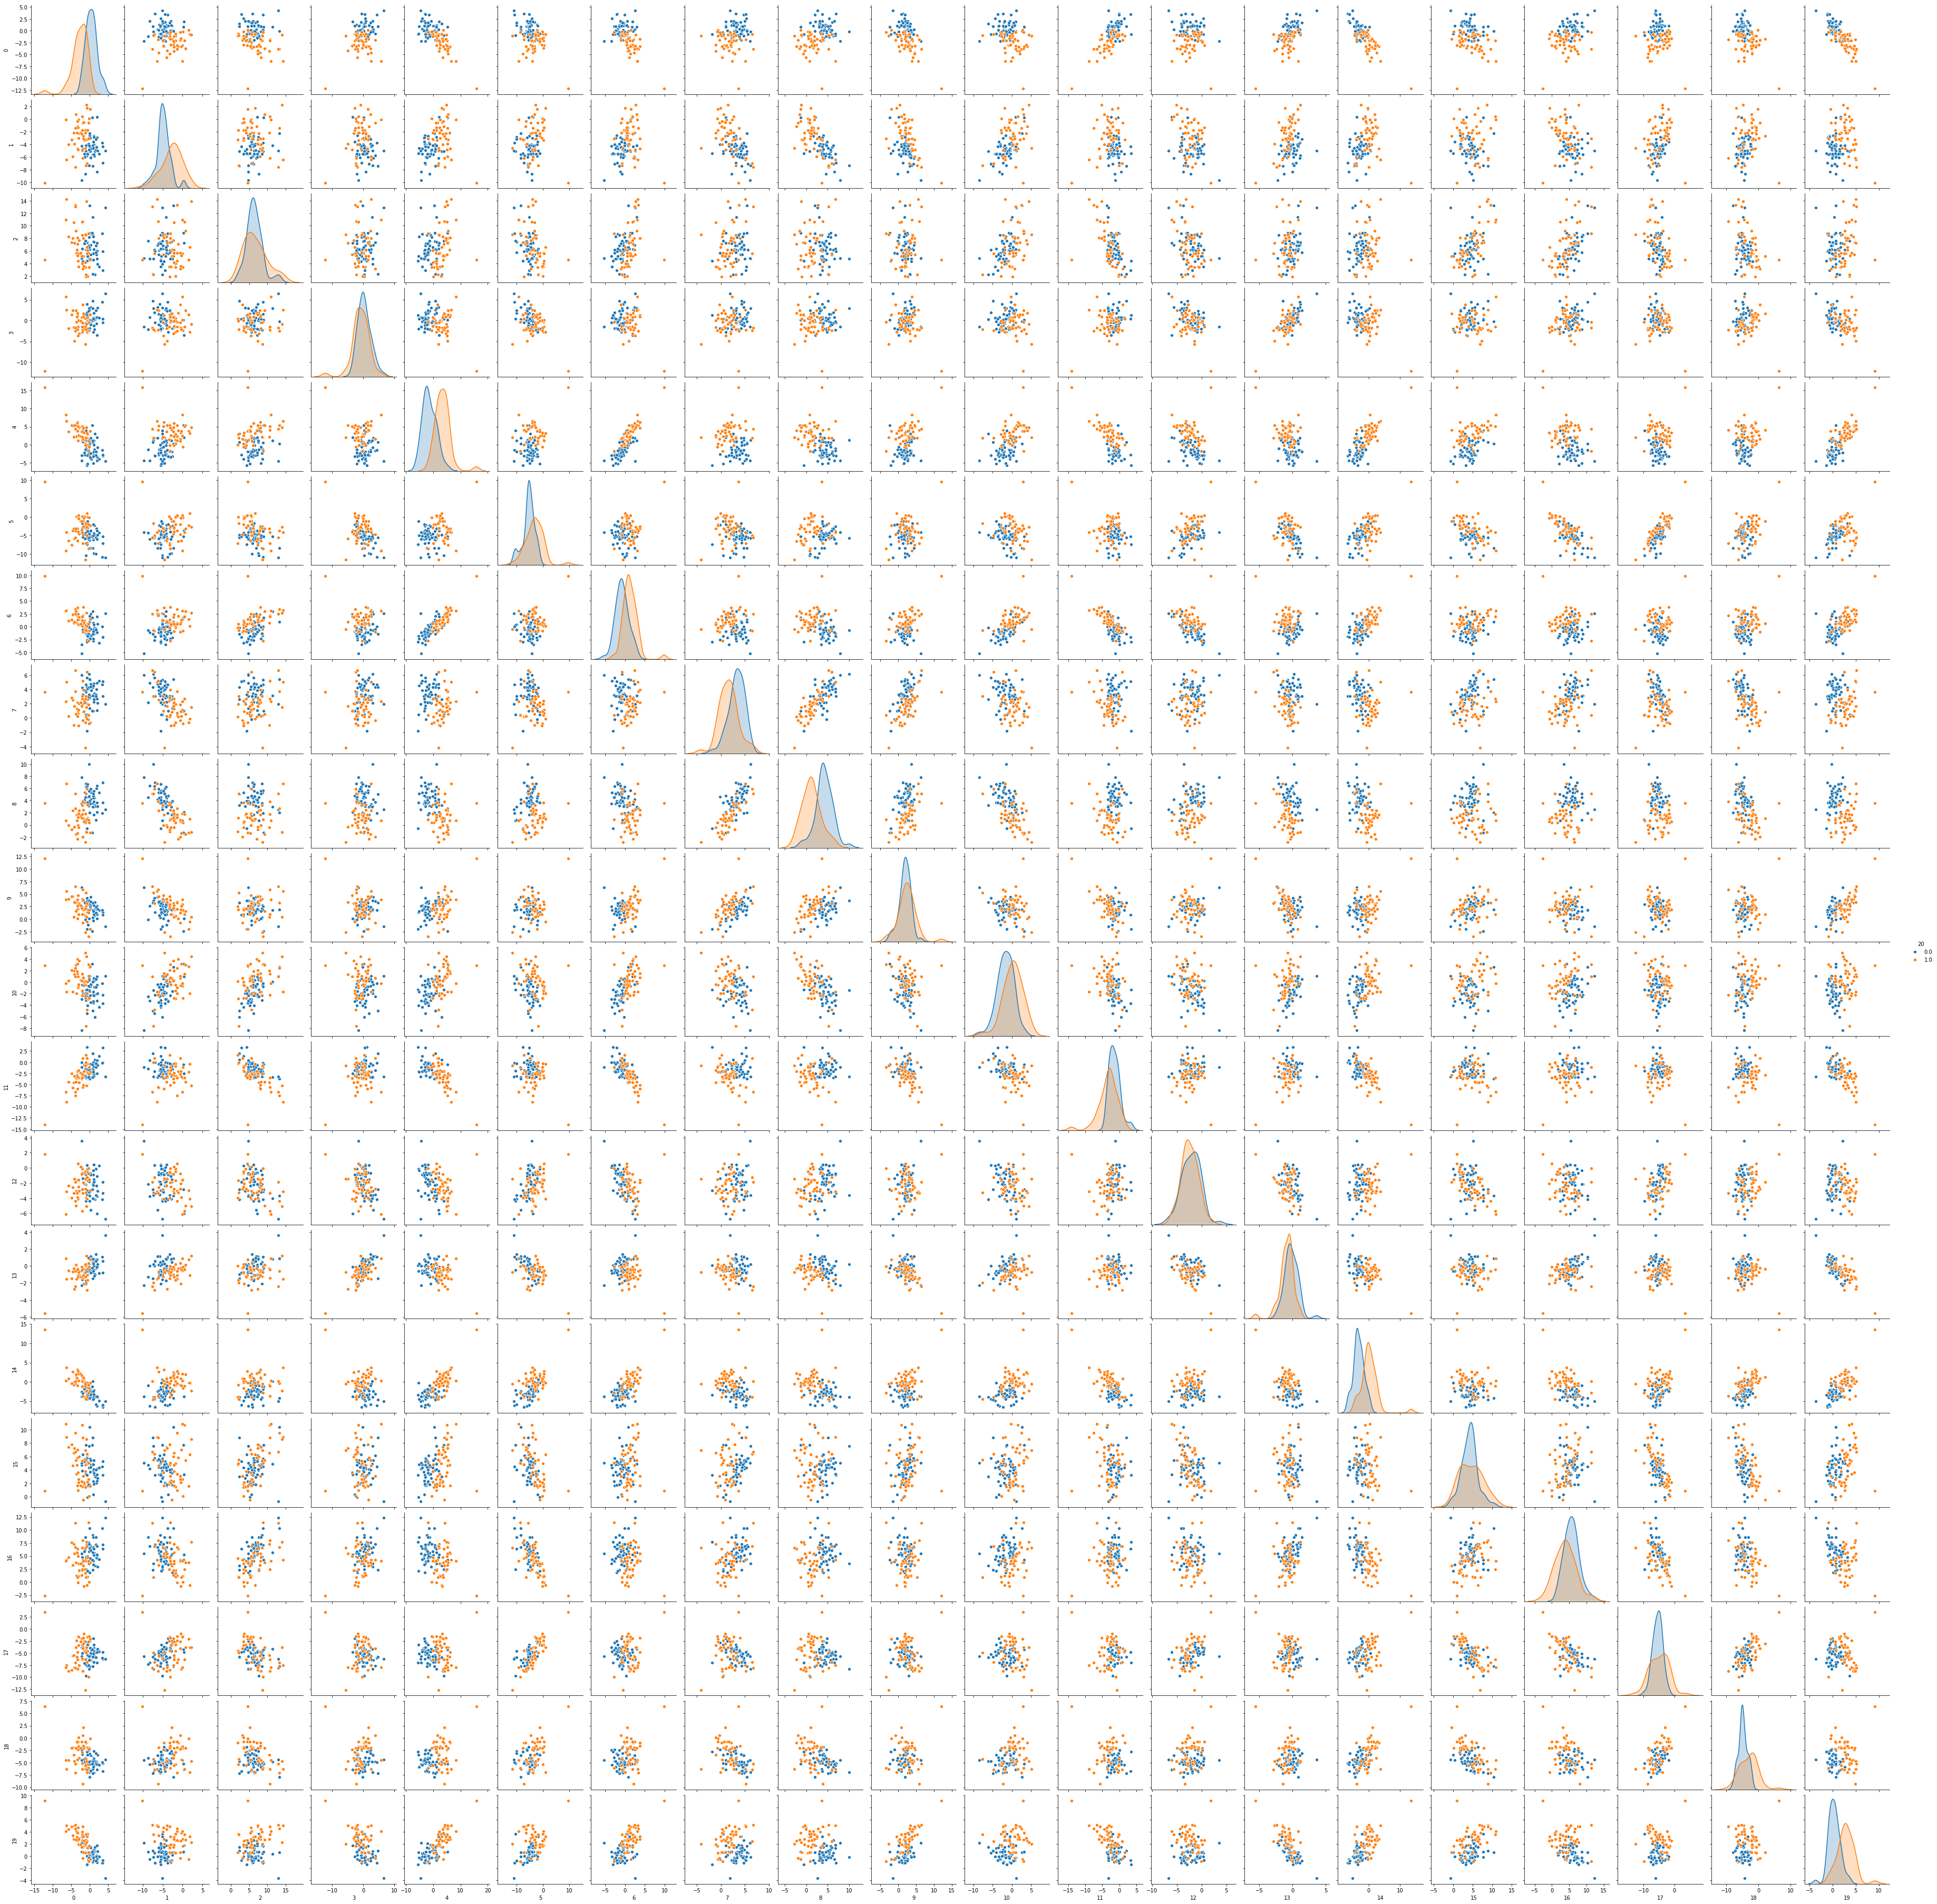

In [27]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
n=10
x1=np.array(X_train[:10,0])
x2=np.array([1]*n)
tmp = []
n=20
for i in range(0,n):
    tmp.append(np.array(X_train[:100,i]))
tmp.append(np.array(y_train[:100]))
X=np.stack(tmp,1)
#print(X)
df=pd.DataFrame(X)
#print(df)
sns.pairplot(df, hue=n)#, kind="reg"
plt.show()

Szczególnie obiecująco wygląda korelacja na wymiarach 4 i 18. Wykorzystamy te dane do nauczenia prostych klasyfikatorów LogisticRegression, DecisionTreeClassifier oraz SVC.

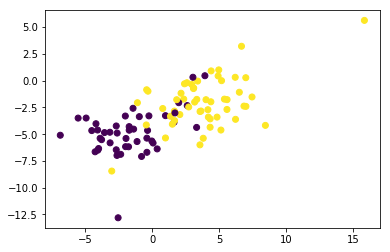

In [9]:
plt.scatter(X_train[:100, 4], X_train[:100, 18], c=y_train[:100])
plt.show()

# LogisticRegression 2D

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train[:,[4,18]], y_train)

/home/bsz/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(log_reg.predict(X_train[:,[4,18]]),y_train))
print(f1_score(log_reg.predict(X_train[:,[4,18]]),y_train))

print(accuracy_score(log_reg.predict(X_test[:,[4,18]]),y_test))
print(f1_score(log_reg.predict(X_test[:,[4,18]]),y_test))

0.8805714285714286
0.8817371622577451
0.889
0.8891846921797005


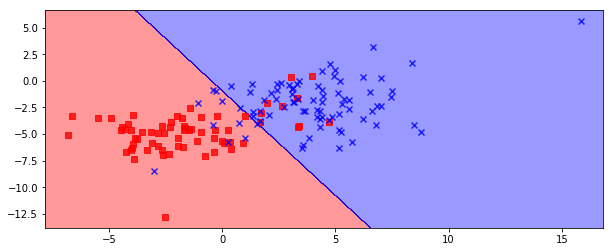

In [14]:
from help_plot import plot_decision_regions
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train[:150,[4,18]], y_train[:150], classifier=log_reg)

# DecisionTreeClassifier 2D

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=42, criterion='entropy')
tree_clf.fit(X_train[:,[4,18]], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [16]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(tree_clf.predict(X_train[:,[4,18]]),y_train))
print(f1_score(tree_clf.predict(X_train[:,[4,18]]),y_train))

print(accuracy_score(tree_clf.predict(X_test[:,[4,18]]),y_test))
print(f1_score(tree_clf.predict(X_test[:,[4,18]]),y_test))

0.9304285714285714
0.9292356873002033
0.8406666666666667
0.836413415468857


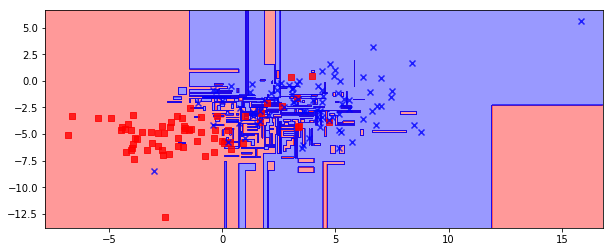

In [17]:
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train[:150,[4,18]], y_train[:150], classifier=tree_clf)


# DecisionTreeClassifier 20D – feature selection

In [18]:
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42, criterion='entropy')
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [19]:
print(accuracy_score(tree_clf2.predict(X_train), y_train))
print(f1_score(tree_clf2.predict(X_train), y_train))

print(accuracy_score(tree_clf2.predict(X_test),y_test))
print(f1_score(tree_clf2.predict(X_test),y_test))

0.9773571428571428
0.9771663185190521
0.8996666666666666
0.898413769827877


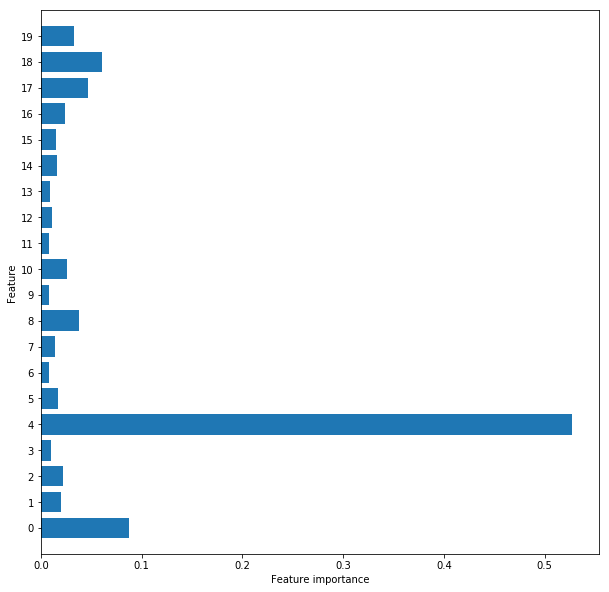

In [20]:
def plot_feature_importances(model):
    n_features = 20
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), range(0,20))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(10, 10))
plot_feature_importances(tree_clf2)
plt.show()

# SVC

In [21]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="poly", degree=3, coef0=1, C=1)
svc_clf.fit(X_train[:,[4,18]], y_train)

/home/bsz/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(tree_clf.predict(X_train[:,[4,18]]),y_train))
print(f1_score(tree_clf.predict(X_train[:,[4,18]]),y_train))

print(accuracy_score(tree_clf.predict(X_test[:,[4,18]]),y_test))
print(f1_score(tree_clf.predict(X_test[:,[4,18]]),y_test))

0.9304285714285714
0.9292356873002033
0.8406666666666667
0.836413415468857


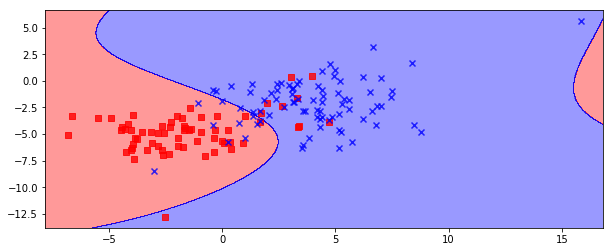

In [23]:
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train[:150,[4,18]], y_train[:150], classifier=svc_clf)

# Tensorflow neural net

Wracamy do reprezentacji próbek na wejściu jako stringów – sieć neuronowa będzie je przekształcać w pierwszej warstwie.

In [24]:
train_examples_batch, train_labels_batch = next(iter(train_dataset.batch(train_size)))
X_train = train_examples_batch.numpy()
test_examples_batch, test_labels_batch = next(iter(test_dataset.batch(test_size)))
X_test = test_examples_batch.numpy()
val_examples_batch, val_labels_batch = next(iter(val_dataset.batch(val_size)))
X_val = val_examples_batch.numpy()

In [25]:
tf.keras.backend.clear_session()

print(X_train.shape)
print(y_train.shape)


def build_model(n_hidden=0, n_neurons=10, trainable=False):
    model = tf.keras.Sequential()
    model.add(hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=trainable))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])
    return model

keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


(14000,)
(14000,)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
keras_class.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)])

Epoch 1/100
438/438 [==============================] - 3s 7ms/step - accuracy: 0.8028 - loss: 0.4326 - val_loss: 0.3307 - val_accuracy: 0.8637
Epoch 2/100
438/438 [==============================] - 3s 7ms/step - accuracy: 0.8706 - loss: 0.3144 - val_loss: 0.2954 - val_accuracy: 0.8807
Epoch 3/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.8827 - loss: 0.2893 - val_loss: 0.2733 - val_accuracy: 0.8877
Epoch 4/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.8899 - loss: 0.2713 - val_loss: 0.2576 - val_accuracy: 0.8950
Epoch 5/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.8956 - loss: 0.2577 - val_loss: 0.2428 - val_accuracy: 0.9020
Epoch 6/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.9002 - loss: 0.2478 - val_loss: 0.2361 - val_accuracy: 0.8993
Epoch 7/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.9035 - loss: 0.2399 - val_loss: 0.2262 - val_accuracy: 0.9060

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2],
    "n_neurons": [1, 5, 10, 15, 20, 30],
}

rnd_search_cv = GridSearchCV(keras_class, param_distribs, cv=3, verbose=2, return_train_score=True)
ret = rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] n_hidden=0, n_neurons=1 .........................................
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


292/292 [==============================] - 3s 9ms/step - accuracy: 0.6941 - loss: 0.9218 - val_loss: 0.4047 - val_accuracy: 0.8340
Epoch 2/100
292/292 [==============================] - 2s 7ms/step - accuracy: 0.8402 - loss: 0.3711 - val_loss: 0.3212 - val_accuracy: 0.8690
Epoch 3/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8636 - loss: 0.3247 - val_loss: 0.2957 - val_accuracy: 0.8807
Epoch 4/100
292/292 [==============================] - 2s 9ms/step - accuracy: 0.8736 - loss: 0.3042 - val_loss: 0.2798 - val_accuracy: 0.8877
Epoch 5/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8799 - loss: 0.2899 - val_loss: 0.2682 - val_accuracy: 0.8907
Epoch 6/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8846 - loss: 0.2785 - val_loss: 0.2588 - val_accuracy: 0.8980
Epoch 7/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8910 - loss: 0.2692 - val_loss: 0.2504 - val_accuracy: 0.8937
Epoch 8/100

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.1s remaining:    0.0s


292/292 [==============================] - 3s 9ms/step - accuracy: 0.8549 - loss: 0.3642 - val_loss: 0.2749 - val_accuracy: 0.8830
Epoch 2/100
292/292 [==============================] - 3s 9ms/step - accuracy: 0.8872 - loss: 0.2678 - val_loss: 0.2600 - val_accuracy: 0.8923
Epoch 3/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8939 - loss: 0.2570 - val_loss: 0.2516 - val_accuracy: 0.8983
Epoch 4/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8971 - loss: 0.2489 - val_loss: 0.2473 - val_accuracy: 0.8977
Epoch 5/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.8996 - loss: 0.2427 - val_loss: 0.2396 - val_accuracy: 0.8990
Epoch 6/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.9011 - loss: 0.2375 - val_loss: 0.2325 - val_accuracy: 0.9050
Epoch 7/100
292/292 [==============================] - 2s 8ms/step - accuracy: 0.9041 - loss: 0.2331 - val_loss: 0.2272 - val_accuracy: 0.9127
Epoch 8/100

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 40.6min finished


Epoch 1/100
438/438 [==============================] - 4s 8ms/step - accuracy: 0.8586 - loss: 0.3338 - val_loss: 0.2241 - val_accuracy: 0.9043
Epoch 2/100
438/438 [==============================] - 3s 7ms/step - accuracy: 0.9079 - loss: 0.2266 - val_loss: 0.2076 - val_accuracy: 0.9183
Epoch 3/100
438/438 [==============================] - 3s 7ms/step - accuracy: 0.9109 - loss: 0.2167 - val_loss: 0.2026 - val_accuracy: 0.9210
Epoch 4/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.9154 - loss: 0.2124 - val_loss: 0.1989 - val_accuracy: 0.9207
Epoch 5/100
438/438 [==============================] - 3s 8ms/step - accuracy: 0.9155 - loss: 0.2083 - val_loss: 0.1965 - val_accuracy: 0.9187
Epoch 6/100
438/438 [==============================] - 3s 7ms/step - accuracy: 0.9165 - loss: 0.2060 - val_loss: 0.1943 - val_accuracy: 0.9207
Epoch 7/100
438/438 [==============================] - 3s 7ms/step - accuracy: 0.9169 - loss: 0.2041 - val_loss: 0.1947 - val_accuracy: 0.9193

{'n_hidden': 1, 'n_neurons': 20}
[0.9082143  0.90978572 0.90578572 0.90828572 0.90857143 0.90885715
 0.90728571 0.91457143 0.9132857  0.91621429 0.9185     0.91478573
 0.63392856 0.91414286 0.91042857 0.90592857 0.90535715 0.91714285]


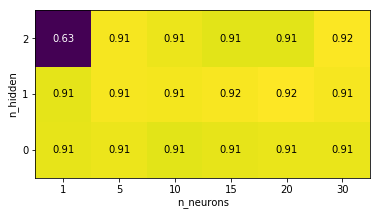

In [51]:
print(rnd_search_cv.best_params_)

import pandas as pd
results = pd.DataFrame(rnd_search_cv.cv_results_)

def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

print(np.array(results.mean_test_score))

scores = np.array(results.mean_test_score).reshape(3, 6)
scores = scores[:,:]
# plot the mean cross-validation scores
heatmap(scores, xlabel='n_neurons', xticklabels=param_distribs['n_neurons'], ylabel='n_hidden', yticklabels=param_distribs['n_hidden'], cmap="viridis")
plt.show()

Sprawdźmy, jak wyniki będą wyglądać z pierwszą warstwą podlegającą trenowaniu.

In [52]:
def build_model(n_hidden=0, n_neurons=10, trainable=True):
    model = tf.keras.Sequential()
    model.add(hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=trainable))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])
    return model

keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2],
    "n_neurons": [1, 5, 10, 15, 20, 30],
}

rnd_search_cv2 = GridSearchCV(keras_class, param_distribs, cv=3, verbose=2, return_train_score=True)
ret2 = rnd_search_cv2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] n_hidden=0, n_neurons=1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
292/292 [==============================] - 4s 13ms/step - accuracy: 0.8477 - loss: 0.3433 - val_loss: 0.1814 - val_accuracy: 0.9240
Epoch 2/100
292/292 [==============================] - 4s 13ms/step - accuracy: 0.9437 - loss: 0.1507 - val_loss: 0.1155 - val_accuracy: 0.9597
Epoch 3/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9697 - loss: 0.0950 - val_loss: 0.0792 - val_accuracy: 0.9710
Epoch 4/100
292/292 [==============================] - 4s 15ms/step - accuracy: 0.9839 - loss: 0.0615 - val_loss: 0.0571 - val_accuracy: 0.9817
Epoch 5/100
292/292 [==============================] - 5s 16ms/step - accuracy: 0.9908 - loss: 0.0410 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 6/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9952 - loss: 0.0283 - val_loss: 0.0352 - val_accuracy: 0.9930
Epoch 7/100
292/292 [==============================] - 5s 17ms/step - accuracy: 0.9975 - loss: 0.0199 - val_loss: 0.0292 - val_accuracy:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


292/292 [==============================] - 4s 14ms/step - accuracy: 0.8376 - loss: 0.3857 - val_loss: 0.2089 - val_accuracy: 0.9197
Epoch 2/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9374 - loss: 0.1623 - val_loss: 0.1352 - val_accuracy: 0.9493
Epoch 3/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9627 - loss: 0.1050 - val_loss: 0.0962 - val_accuracy: 0.9633
Epoch 4/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9780 - loss: 0.0710 - val_loss: 0.0709 - val_accuracy: 0.9727
Epoch 5/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9876 - loss: 0.0496 - val_loss: 0.0550 - val_accuracy: 0.9820
Epoch 6/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9921 - loss: 0.0356 - val_loss: 0.0451 - val_accuracy: 0.9857
Epoch 7/100
292/292 [==============================] - 4s 14ms/step - accuracy: 0.9944 - loss: 0.0258 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoc

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 180.7min finished


Epoch 1/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.6769 - loss: 0.8479 - val_loss: 0.1779 - val_accuracy: 0.9303
Epoch 2/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.9539 - loss: 0.1358 - val_loss: 0.0968 - val_accuracy: 0.9667
Epoch 3/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.9783 - loss: 0.0801 - val_loss: 0.0647 - val_accuracy: 0.9783
Epoch 4/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.9886 - loss: 0.0522 - val_loss: 0.0447 - val_accuracy: 0.9897
Epoch 5/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.9936 - loss: 0.0351 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 6/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.9959 - loss: 0.0244 - val_loss: 0.0263 - val_accuracy: 0.9947
Epoch 7/100
438/438 [==============================] - 6s 13ms/step - accuracy: 0.9971 - loss: 0.0169 - val_loss: 0.0209 - val_accuracy:

{'n_hidden': 0, 'n_neurons': 1}
[0.99442857 0.99407143 0.99350001 0.99314284 0.99335714 0.99307144
 0.82685715 0.99271427 0.99257145 0.99185712 0.99271429 0.992
 0.65957142 0.9922143  0.99100002 0.99092857 0.99221427 0.98842858]


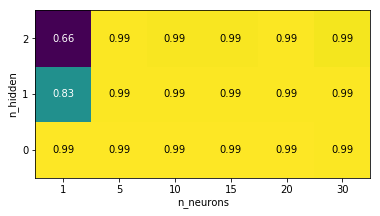

In [54]:
print(rnd_search_cv2.best_params_)

results = pd.DataFrame(rnd_search_cv2.cv_results_)

print(np.array(results.mean_test_score))

scores = np.array(results.mean_test_score).reshape(3, 6)
scores = scores[:,:]
# plot the mean cross-validation scores
heatmap(scores, xlabel='n_neurons', xticklabels=param_distribs['n_neurons'], ylabel='n_hidden', yticklabels=param_distribs['n_hidden'], cmap="viridis")
plt.show()

In [59]:
model = tf.keras.Sequential()
model.add(hub.KerasLayer(embedding, input_shape=[], 
                         dtype=tf.string, trainable=True))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_136 (KerasLayer) (None, 20)                400020    
_________________________________________________________________
dense_281 (Dense)            (None, 16)                336       
_________________________________________________________________
dense_282 (Dense)            (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
history = model.fit(train_dataset.shuffle(10000).batch(512),
                    epochs=100,
                    validation_data=val_dataset.batch(512),
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1)])

Epoch 1/100
28/28 [==============================] - 2s 86ms/step - accuracy: 0.5853 - loss: 1.0626 - val_loss: 0.5052 - val_accuracy: 0.7503
Epoch 2/100
28/28 [==============================] - 2s 82ms/step - accuracy: 0.8043 - loss: 0.3943 - val_loss: 0.3227 - val_accuracy: 0.8530
Epoch 3/100
28/28 [==============================] - 2s 82ms/step - accuracy: 0.8693 - loss: 0.3032 - val_loss: 0.2768 - val_accuracy: 0.8910
Epoch 4/100
28/28 [==============================] - 2s 82ms/step - accuracy: 0.8929 - loss: 0.2649 - val_loss: 0.2475 - val_accuracy: 0.9017
Epoch 5/100
28/28 [==============================] - 2s 82ms/step - accuracy: 0.9092 - loss: 0.2363 - val_loss: 0.2235 - val_accuracy: 0.9167
Epoch 6/100
28/28 [==============================] - 2s 82ms/step - accuracy: 0.9208 - loss: 0.2120 - val_loss: 0.2026 - val_accuracy: 0.9257
Epoch 7/100
28/28 [==============================] - 2s 81ms/step - accuracy: 0.9297 - loss: 0.1906 - val_loss: 0.1841 - val_accuracy: 0.9320
Epoch 

In [63]:
results = model.evaluate(val_dataset.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

6/6 - 0s - accuracy: 0.9923 - loss: 0.0182
loss: 0.018
accuracy: 0.992


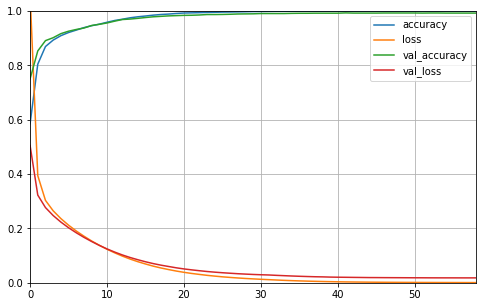

In [64]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
